# 고양시 사업체수

In [1]:
import pandas as pd
import glob

file_paths = glob.glob('*년_산업_세세분류별_총괄*.csv')
goyang_dfs = [pd.read_csv(file, encoding='cp949', header=0) for file in file_paths]
goyang_dfs_merged = pd.concat(goyang_dfs, ignore_index=True)

# display(df_merged)
# display(df_merged.shape)

In [2]:
# 필터링할 항목 리스트
filter_items = ['종사자규모별-1~4명[사업체수]','-5~9명[사업체수]', '-10~19명[사업체수]', '-20~49명[사업체수]', 
                '-50~99명[사업체수]', '-100~299명[사업체수]', '-300~499명[사업체수]', '-500~999명[사업체수]', '-1000명시상[사업체수]',
                '종사자규모별-1~4명[사업체수] (개)', '-5~9명[사업체수] (개)', '-10~19명[사업체수] (개)', '-20~49명[사업체수] (개)', 
                '-50~99명[사업체수] (개)', '-100~299명[사업체수] (개)', '-300~499명[사업체수] (개)', '-500~999명[사업체수] (개)', 
                '-1000명이상[사업체수] (개)']

# 데이터프레임 필터링
goyang_dfs_merged.replace('-', 0, inplace=True)
goyang_filtered_df = goyang_dfs_merged[goyang_dfs_merged['항목'].isin(filter_items)].fillna(0)

# Remove '-' and '[사업체수]' and '(개)' from '항목' column
goyang_filtered_df['항목'] = goyang_filtered_df['항목'].str.replace('-', '', regex=False)
goyang_filtered_df['항목'] = goyang_filtered_df['항목'].str.replace('[사업체수]', '', regex=False)
goyang_filtered_df['항목'] = goyang_filtered_df['항목'].str.replace('(개)', '', regex=False)
goyang_filtered_df['항목'] = goyang_filtered_df['항목'].str.replace('종사자규모별', '', regex=False)
goyang_filtered_df['항목'] = goyang_filtered_df['항목'].str.replace('1000명시상', '1000명이상', regex=False)
goyang_filtered_df['항목'] = goyang_filtered_df['항목'].str.replace(' ', '', regex=False)

# 필터링된 데이터프레임 출력
display(goyang_filtered_df)
display(goyang_filtered_df.shape)

,시점,항목,전 산 업,농업 임업 및 어업 (01 ~ 03),제조업 (10 ~ 33),전기 가스 증기 및 수도사업 (35 ~ 36),하수 · 폐기물 처리 원료재생 및 환경복원업 (37 ~ 39),건설업 (41 ~ 42),도매 및 소매업(45~47),운수업(49~52),...,J.정보통신업(58~63),K.금융 및 보험업(64~66),L.부동산업(68),M.전문 과학 및 기술 서비스업(70~73),N.사업시설 관리 사업 지원 및 임대 서비스업(74~76),O.공공행정 국방 및 사회보장 행정(84),P.교육 서비스업(85),Q.보건업 및 사회복지 서비스업(86~87),R.예술 스포츠 및 여가관련 서비스업(90~91),S.협회 및 단체 수리 및 기타 개인 서비스업(94~96)
18,2009,1~4명,37711,4,2235,0,11,741,9569,4348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2009,5~9명,5895,1,958,0,18,310,1241,119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2009,10~19명,2347,2,422,1,12,184,408,73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2009,20~49명,1096,2,179,1,13,80,152,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2009,50~99명,314,0,24,4,0,20,22,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022,50~99명,472,0,0,0,0,0,0,0,...,9.0,27.0,4.0,22.0,24.0,9.0,115.0,111.0,15.0,7.0
496,2022,100~299명,183,0,0,0,0,0,0,0,...,7.0,4.0,1.0,5.0,15.0,6.0,34.0,31.0,6.0,2.0
498,2022,300~499명,24,0,0,0,0,0,0,0,...,2.0,0.0,0.0,0.0,6.0,7.0,2.0,2.0,0.0,0.0
500,2022,500~999명,9,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0


(126, 43)

In [3]:
# 각 행의 2번째 컬럼부터 끝까지의 값을 더한 합계를 새로운 컬럼 '합계'에 추가
goyang_numeric_cols = goyang_filtered_df.select_dtypes(include='number').columns
goyang_filtered_sum_df = goyang_filtered_df[['시점', '항목', '전 산 업']]

# 필터링된 데이터프레임 출력
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # display(filtered_sum_df)
# display(filtered_sum_df.shape)

# Define the classification function
def classify_company_size(row):
    if row['항목'] in ['1~4명', '5~9명']:
        return '소기업'
    elif row['항목'] in ['10~19명', '20~49명', '50~99명', '100~299명']:
        return '중소기업'
    elif row['항목'] in ['300~499명', '500~999명']:
        return '중견기업'
    elif row['항목'] == '1000명이상':
        return '대기업'
    else:
        return '기타'

# Apply the classification function
goyang_filtered_sum_df['기업규모'] = goyang_filtered_sum_df.apply(classify_company_size, axis=1)

# 연도별 기업규모별 전 산 업 인원 합계 구하기
goyang_company_size_sum = goyang_filtered_sum_df.groupby(['시점', '기업규모'])['전 산 업'].sum().unstack().fillna(0)

# 컬럼 이름 변경
goyang_company_size_sum.columns = [f'{col} 사업체수' for col in goyang_company_size_sum.columns]

# 결과 출력
display(goyang_company_size_sum)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_29660\2073648650.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goyang_filtered_sum_df['기업규모'] = goyang_filtered_sum_df.apply(classify_company_size, axis=1)


,대기업 사업체수,소기업 사업체수,중견기업 사업체수,중소기업 사업체수
시점,,,,
2009,2,43606,24,3891
2010,5,45467,19,4115
2011,5,47461,25,4202
2012,6,49715,19,4185
2013,5,51157,20,4237
2014,5,54717,18,4560
2015,5,56023,24,4817
2016,6,58442,23,5171
2017,6,61298,25,5292


# 성남시 사업체수

In [4]:
import pandas as pd
import glob

# 특정 패턴에 맞는 모든 CSV 파일의 리스트를 가져옵니다.
file_paths = glob.glob('../성남시 산업체/*세세분류별_총괄*.csv')

dataframes = []

for file_path in file_paths:
    # 헤더 없이 CSV 파일을 읽어옵니다.
    df = pd.read_csv(file_path, header=None, encoding='cp949')
    
    # 0번째 행을 가져옵니다.
    row_zero = df.iloc[0]
    
    # '시점' 열을 row_zero로 삽입합니다.
    df.insert(0, '시점', row_zero)
    
    # 0번째 행을 삭제합니다.
    df = df.drop(df.index[0]).reset_index(drop=True)
    
    # '시점' 열의 내용을 아래로 한 칸 이동시킵니다.
    df['시점'] = df['시점'].shift(1)
    
    # (0, 0) 위치에 '시점'을 넣습니다.
    df.loc[0, '시점'] = '시점'
    
    dataframes.append(df)

# 모든 데이터프레임을 하나로 합칩니다.
seongnam_combined_df = pd.concat(dataframes, ignore_index=True)

# '시점' 컬럼의 결측값을 이전 값으로 채웁니다.
seongnam_combined_df['시점'] = seongnam_combined_df['시점'].fillna(method='ffill')

# 첫 번째 행을 헤더로 설정
seongnam_combined_df.columns = seongnam_combined_df.iloc[0]
seongnam_combined_df = seongnam_combined_df.drop(seongnam_combined_df.index[0]).reset_index(drop=True)

# 결과 데이터프레임을 출력합니다.
# display(seongnam_combined_df)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_29660\199383011.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seongnam_combined_df['시점'] = seongnam_combined_df['시점'].fillna(method='ffill')


In [5]:
# 필터링할 항목 리스트
filter_items = ['종사자규모별-[1~4명]-사업체수 (개소)', '-[5~9명]-사업체수 (개소)', '-[10~19명]-사업체수 (개소)', '-[20~49명]-사업체수 (개소)', 
                '-[50~99명]-사업체수 (개소)', '-[100~299명]-사업체수 (개소)', '-[300~499명]-사업체수 (개소)', '-[500~999명]-사업체수 (개소)', '-[1,000명 이상]-사업체수 (개소)']

# 데이터프레임 필터링
seongnam_combined_df.replace('-', 0, inplace=True)
seongnam_filtered_df = seongnam_combined_df[seongnam_combined_df['항목'].isin(filter_items)].fillna(0)

# Remove '-' and '[사업체수]' and '(개)' from '항목' column
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace('-', '', regex=False)
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace('종사자규모별', '', regex=False)
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace('사업체수', '', regex=False)
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace('[', '', regex=False)
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace(']', '', regex=False)
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace('(개소)', '', regex=False)
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace(',', '', regex=False)
seongnam_filtered_df['항목'] = seongnam_filtered_df['항목'].str.replace(' ', '', regex=False)

# 필터링된 데이터프레임 출력
display(seongnam_filtered_df)
display(seongnam_filtered_df.shape)

,시점,항목,전 산 업,농업 임업 및 어업 (01 ~ 03),농업,임업,광업 (05 ~ 08),석탄 원유 및 천연가스 광업,비금속광물 광업 연료용 제외,광업 지원 서비스업,...,창작 예술 및 여가관련 서비스업,스포츠 및 오락관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업(94 ~ 96),협회 및 단체,수리업,기타 개인 서비스업,NaN,NaN,NaN,NaN
18,2009,1~4명,39577,1,1,0,1,0,0,1,...,99,1515,5095,960,1039,3096,0,0,0,0
20,2009,5~9명,5742,0,0,0,0,0,0,0,...,10,60,294,89,78,127,0,0,0,0
22,2009,10~19명,2552,1,0,1,1,0,1,0,...,5,18,117,22,34,61,0,0,0,0
24,2009,20~49명,1407,1,1,0,0,0,0,0,...,7,9,51,11,19,21,0,0,0,0
26,2009,50~99명,420,0,0,0,1,1,0,0,...,1,5,6,3,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2022,50~99명,731,0,0,0,0,0,0,0,...,82,26,56,9,4,5,12,6,4,2
505,2022,100~299명,428,0,0,0,0,0,0,0,...,31,20,11,5,2,3,6,5,1,0
507,2022,300~499명,62,0,0,0,0,0,0,0,...,2,2,0,0,0,0,1,0,0,1
509,2022,500~999명,47,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


(123, 96)

In [15]:
# 각 행의 2번째 컬럼부터 끝까지의 값을 더한 합계를 새로운 컬럼 '합계'에 추가
seongnam_numeric_cols = seongnam_filtered_df.select_dtypes(include='number').columns
seongnam_filtered_df['전 산 업'] = seongnam_filtered_df['전 산 업'].astype(int)
seongnam_filtered_sum_df = seongnam_filtered_df[['시점', '항목', '전 산 업']]

# # 필터링된 데이터프레임 출력
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(seongnam_filtered_sum_df)
display(seongnam_filtered_sum_df.shape)

def classify_company_size(row):
    if row['항목'] in ['1~4명', '5~9명']:
        return '소기업'
    elif row['항목'] in ['10~19명', '20~49명', '50~99명', '100~299명']:
        return '중소기업'
    elif row['항목'] in ['300~499명', '500~999명']:
        return '중견기업'
    elif row['항목'] == '1000명이상':
        return '대기업'
    else:
        return '기타'

seongnam_filtered_sum_df['기업규모'] = seongnam_filtered_sum_df.apply(classify_company_size, axis=1)

# 연도별 기업규모별 전 산 업 인원 합계 구하기
seongnam_company_size_sum = seongnam_filtered_sum_df.groupby(['시점', '기업규모'])['전 산 업'].sum().unstack().fillna(0)

# 컬럼 이름 변경
seongnam_company_size_sum.columns = [f'{col} 사업체수' for col in seongnam_company_size_sum.columns]

# 결과 출력
display(seongnam_company_size_sum)

,시점,항목,전 산 업
18,2009,1~4명,39577
20,2009,5~9명,5742
22,2009,10~19명,2552
24,2009,20~49명,1407
26,2009,50~99명,420
28,2009,100~299명,192
30,2009,300~499명,22
32,2009,500~999명,16
34,2009,1000명이상,13
55,2010,1~4명,40482


(123, 3)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_29660\3305046203.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seongnam_filtered_sum_df['기업규모'] = seongnam_filtered_sum_df.apply(classify_company_size, axis=1)


,대기업 사업체수,소기업 사업체수,중견기업 사업체수,중소기업 사업체수
시점,,,,
2009,13.0,45319.0,38.0,4571.0
2010,14.0,45889.0,44.0,4976.0
2011,17.0,48720.0,51.0,5212.0
2012,17.0,51060.0,53.0,5306.0
2013,23.0,52131.0,65.0,5723.0
2014,20.0,54677.0,65.0,6079.0
2015,19.0,55974.0,82.0,6393.0
2016,20.0,57411.0,88.0,6450.0
2017,21.0,57534.0,90.0,6543.0


# 사업체수 시각화

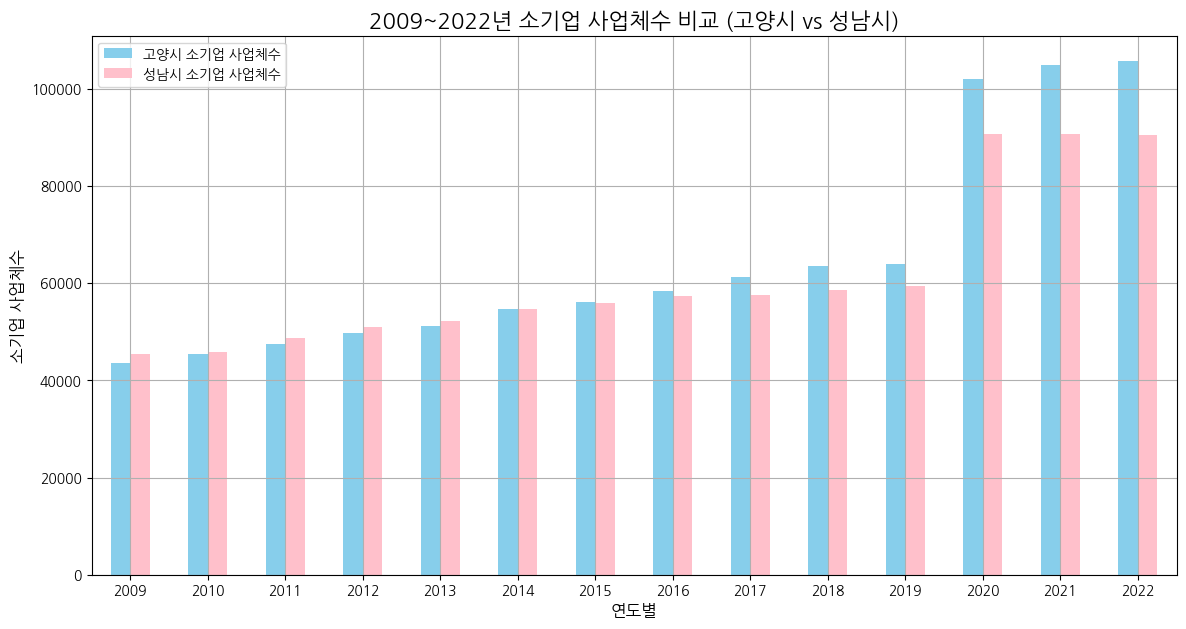

In [7]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# Ensure the indices are of the same type
goyang_company_size_sum.index = goyang_company_size_sum.index.astype(str)
seongnam_company_size_sum.index = seongnam_company_size_sum.index.astype(str)

# 고양시와 성남시의 소기업 사업체수 비교를 위한 데이터프레임 생성
comparison_df = pd.DataFrame({
    '시점': goyang_company_size_sum.index,
    '고양시 소기업 사업체수': goyang_company_size_sum['소기업 사업체수'],
    '성남시 소기업 사업체수': seongnam_company_size_sum['소기업 사업체수']
}).set_index('시점')

# 막대 그래프 그리기
comparison_df.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'pink'])

plt.title('2009~2022년 소기업 사업체수 비교 (고양시 vs 성남시)', fontproperties=fontprop, fontsize=16)
plt.xlabel('연도별', fontproperties=fontprop, fontsize=12)
plt.ylabel('소기업 사업체수', fontproperties=fontprop, fontsize=12)
plt.xticks(fontproperties=fontprop, rotation=0)
plt.yticks(fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.grid(True)
plt.show()

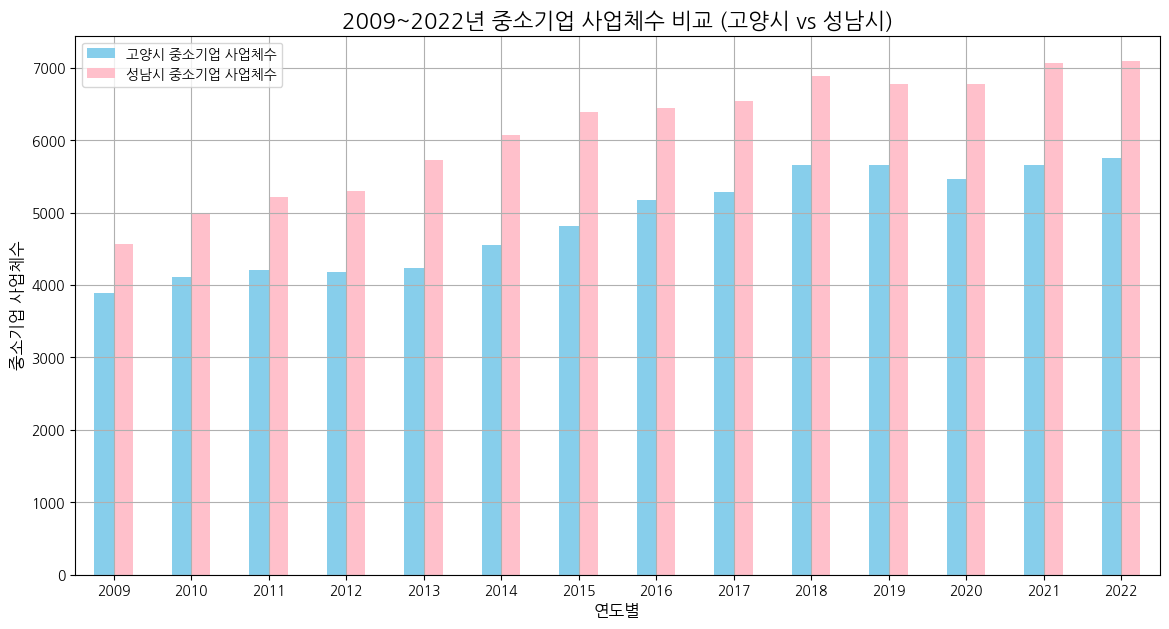

In [8]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# Ensure the indices are of the same type
goyang_company_size_sum.index = goyang_company_size_sum.index.astype(str)
seongnam_company_size_sum.index = seongnam_company_size_sum.index.astype(str)

# 고양시와 성남시의 소기업 사업체수 비교를 위한 데이터프레임 생성
comparison_df = pd.DataFrame({
    '시점': goyang_company_size_sum.index,
    '고양시 중소기업 사업체수': goyang_company_size_sum['중소기업 사업체수'],
    '성남시 중소기업 사업체수': seongnam_company_size_sum['중소기업 사업체수']
}).set_index('시점')

# 막대 그래프 그리기
comparison_df.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'pink'])

plt.title('2009~2022년 중소기업 사업체수 비교 (고양시 vs 성남시)', fontproperties=fontprop, fontsize=16)
plt.xlabel('연도별', fontproperties=fontprop, fontsize=12)
plt.ylabel('중소기업 사업체수', fontproperties=fontprop, fontsize=12)
plt.xticks(fontproperties=fontprop, rotation=0)
plt.yticks(fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.grid(True)
plt.show()

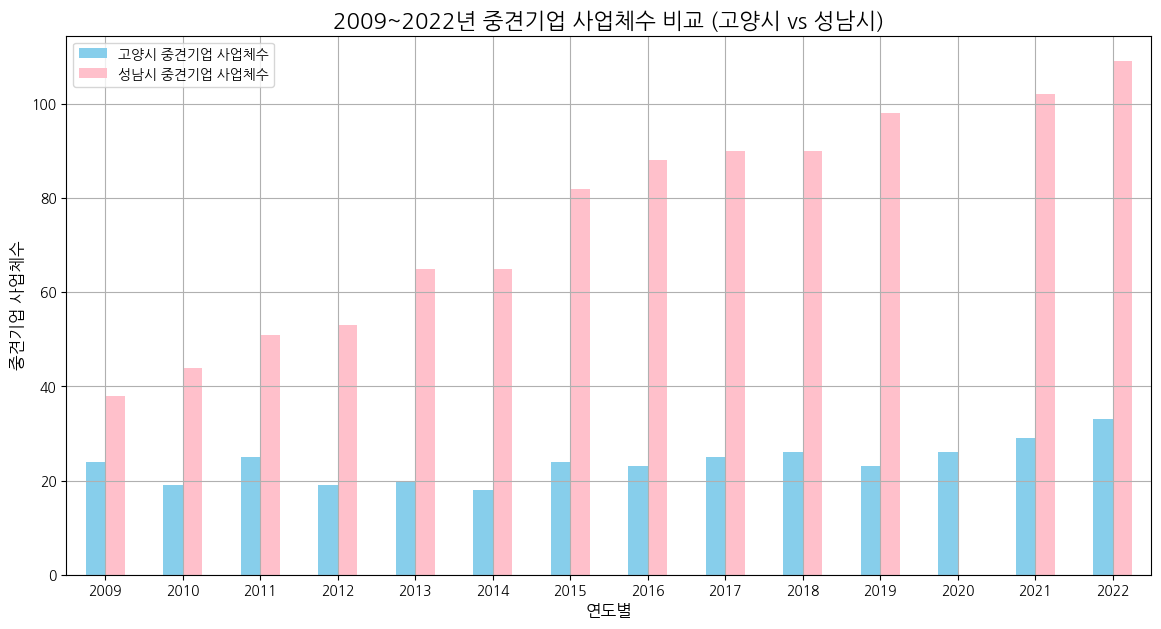

In [9]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# Ensure the indices are of the same type
goyang_company_size_sum.index = goyang_company_size_sum.index.astype(str)
seongnam_company_size_sum.index = seongnam_company_size_sum.index.astype(str)

# 고양시와 성남시의 소기업 사업체수 비교를 위한 데이터프레임 생성
comparison_df = pd.DataFrame({
    '시점': goyang_company_size_sum.index,
    '고양시 중견기업 사업체수': goyang_company_size_sum['중견기업 사업체수'],
    '성남시 중견기업 사업체수': seongnam_company_size_sum['중견기업 사업체수']
}).set_index('시점')

# 막대 그래프 그리기
comparison_df.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'pink'])

plt.title('2009~2022년 중견기업 사업체수 비교 (고양시 vs 성남시)', fontproperties=fontprop, fontsize=16)
plt.xlabel('연도별', fontproperties=fontprop, fontsize=12)
plt.ylabel('중견기업 사업체수', fontproperties=fontprop, fontsize=12)
plt.xticks(fontproperties=fontprop, rotation=0)
plt.yticks(fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.grid(True)
plt.show()

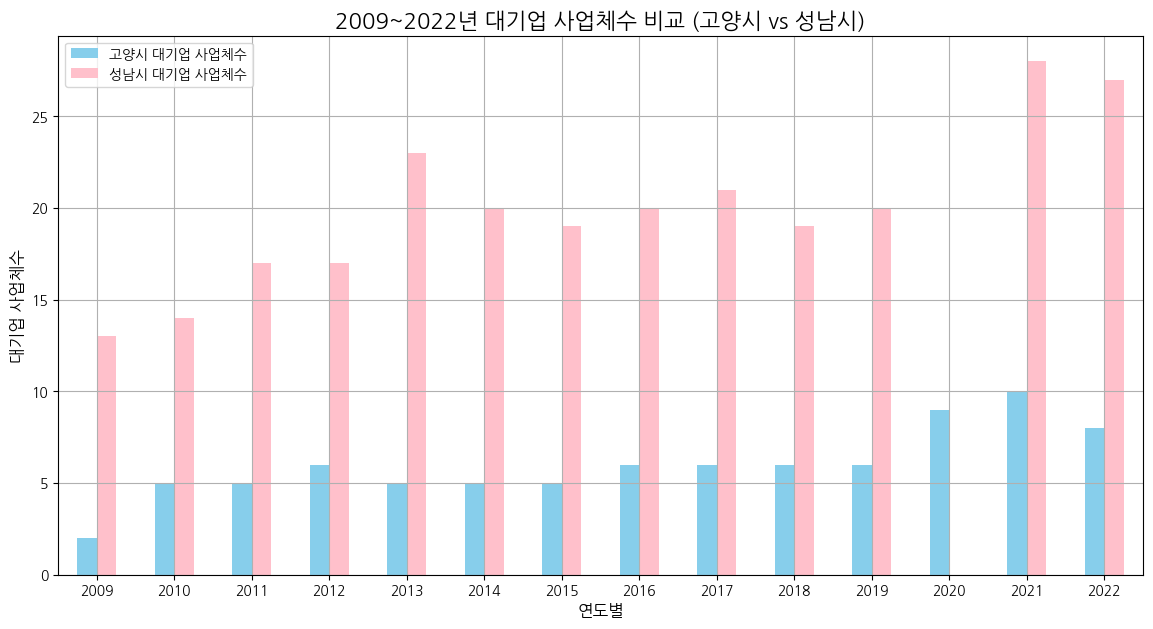

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# Ensure the indices are of the same type
goyang_company_size_sum.index = goyang_company_size_sum.index.astype(str)
seongnam_company_size_sum.index = seongnam_company_size_sum.index.astype(str)

# 고양시와 성남시의 소기업 사업체수 비교를 위한 데이터프레임 생성
comparison_df = pd.DataFrame({
    '시점': goyang_company_size_sum.index,
    '고양시 대기업 사업체수': goyang_company_size_sum['대기업 사업체수'],
    '성남시 대기업 사업체수': seongnam_company_size_sum['대기업 사업체수']
}).set_index('시점')

# 막대 그래프 그리기
comparison_df.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'pink'])

plt.title('2009~2022년 대기업 사업체수 비교 (고양시 vs 성남시)', fontproperties=fontprop, fontsize=16)
plt.xlabel('연도별', fontproperties=fontprop, fontsize=12)
plt.ylabel('대기업 사업체수', fontproperties=fontprop, fontsize=12)
plt.xticks(fontproperties=fontprop, rotation=0)
plt.yticks(fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.grid(True)
plt.show()

# 고용률 & 실업률

In [11]:
import pandas as pd
import glob

file_paths = glob.glob('*산업소분류_및_시도별_사업체수__종사자수*.csv')
dfs = [pd.read_csv(file, encoding='cp949', header=0) for file in file_paths]
df_merged = pd.concat(dfs, ignore_index=True)

# display(df_merged)
# display(df_merged.shape)

In [12]:
# 필터링할 항목 리스트
filter_items = [
    '식사동', '중산동', '정발산동', '풍산동', '백석동', '마두동', '장항동', '일산동',
    '주엽동', '대화동', '탄현동', '식사1동', '식사2동', '중산1동', '중산2동', '정발산1동',
    '정발산2동', '풍산1동', '풍산2동', '백석1동', '백석2동', '마두1동', '마두2동', '장항1동',
    '장항2동', '일산1동', '일산2동', '일산3동', '주엽1동', '주엽2동', '대화1동', '대화2동',
    '탄현1동', '탄현2동'
]

# Convert '항목' column to string type
df_merged.replace('-', 0, inplace=True)
df_merged['항목'] = df_merged['항목'].astype(str)

# 데이터프레임 필터링
filtered_df = df_merged[df_merged['항목'].apply(lambda x: any(item in x for item in filter_items))].fillna(0)
filtered_df = filtered_df[~filtered_df['항목'].str.contains('종사자')]
filtered_df = filtered_df[~filtered_df['항목'].str.contains('(명)')]

filtered_df['항목'] = filtered_df['항목'].str.replace('-', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('사업체수', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('(개)', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('명)(', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('종사자규모별', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('1000명시상', '1000명이상', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace(' ', '', regex=False)
filtered_df = filtered_df[~filtered_df['항목'].str.contains('일산동구')]

# 필터링된 데이터프레임 출력
display(filtered_df)
display(filtered_df.shape)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_29660\3287375717.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = filtered_df[~filtered_df['항목'].str.contains('(명)')]


,시점,항목,전 산 업,농업 임업 및 어업 (01 ~ 03),제조업 (10 ~ 33),전기 가스 증기 및 수도사업 (35 ~ 36),하수 · 폐기물 처리 원료재생 및 환경복원업 (37 ~ 39),건설업 (41 ~ 42),도매 및 소매업(45~47),운수업(49~52),...,TT 전체산업.9,TT 전체산업.10,TT 전체산업.11,TT 전체산업.12,TT 전체산업.13,TT 전체산업.14,TT 전체산업.15,TT 전체산업.16,TT 전체산업.17,TT 전체산업.18
44,2009,식사동,1115,1,223.0,0,5,28.0,284.0,353.0,...,0,0,0,0,0,0,0,0,0,0
46,2009,중산동,1319,0,19.0,0,0,19.0,244.0,189.0,...,0,0,0,0,0,0,0,0,0,0
48,2009,정발산동,1470,0,41.0,0,1,63.0,327.0,55.0,...,0,0,0,0,0,0,0,0,0,0
50,2009,풍산동,1147,0,35.0,0,0,16.0,230.0,151.0,...,0,0,0,0,0,0,0,0,0,0
52,2009,백석1동,1486,0,200.0,3,1,53.0,289.0,108.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2022,탄현1동,2621,0,0.0,0,0,0.0,0.0,0.0,...,74,10,105,60,56,2,165,114,116,173
872,2022,탄현2동,768,0,0.0,0,0,0.0,0.0,0.0,...,25,4,28,23,33,1,92,38,11,56
875,2022,주엽1동,1942,0,0.0,0,0,0.0,0.0,0.0,...,56,22,121,75,56,2,207,137,51,207
876,2022,주엽2동,2612,0,0.0,0,0,0.0,0.0,0.0,...,118,18,140,145,65,2,243,120,87,276


(216, 43)

In [13]:
# 각 행의 2번째 컬럼부터 끝까지의 값을 더한 합계를 새로운 컬럼 '합계'에 추가
numeric_cols = filtered_df.select_dtypes(include='number').columns
filtered_df['전 산 업'] = filtered_df['전 산 업'].astype(float)
filtered_sum_df = filtered_df[['시점', '항목', '전 산 업']]

# 필터링된 데이터프레임 출력
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_sum_df)
display(filtered_sum_df.shape)

,시점,항목,전 산 업
44,2009,식사동,1115.0
46,2009,중산동,1319.0
48,2009,정발산동,1470.0
50,2009,풍산동,1147.0
52,2009,백석1동,1486.0
54,2009,마두1동,1214.0
56,2009,마두2동,735.0
58,2009,장항1동,1327.0
60,2009,장항2동,4215.0
68,2009,일산1동,904.0


(216, 3)

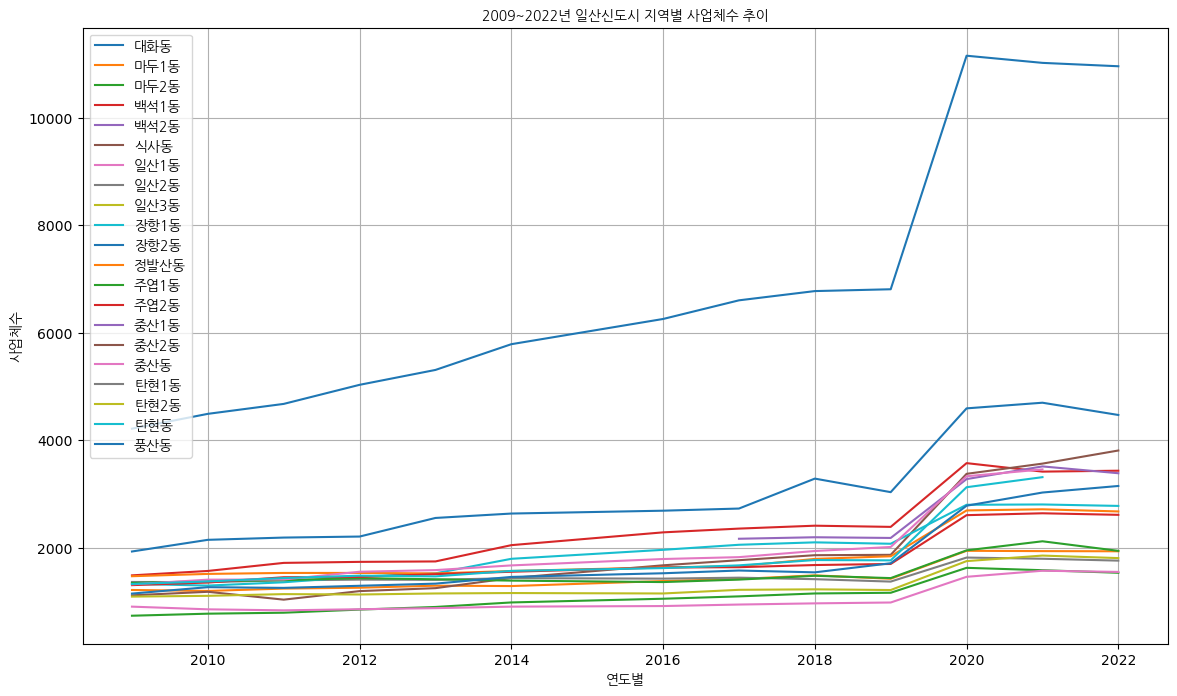

In [14]:
import matplotlib.pyplot as plt

# 데이터프레임 피벗
pivot_df = filtered_sum_df.pivot(index='시점', columns='항목', values='전 산 업')

# Convert column values to strings
pivot_df.columns = pivot_df.columns.astype(str)

# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=str(column))

plt.title('2009~2022년 일산신도시 지역별 사업체수 추이', fontproperties=fontprop)
plt.xlabel('연도별', fontproperties=fontprop)
plt.ylabel('사업체수', fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.grid(True)
plt.show()